In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [229]:
data_raw = pd.read_csv('../fedex.csv')

#### Exploracion ####

In [230]:
data_raw.head(5)

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [231]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB


In [232]:
data_raw.isnull().sum()

Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
Actual_Shipment_Time     81602
Planned_Shipment_Time        0
Planned_Delivery_Time        0
Carrier_Name                 0
Carrier_Num                  0
Planned_TimeofTravel       547
Shipment_Delay           81602
Source                       0
Destination                  0
Distance                     0
Delivery_Status          81602
dtype: int64

In [233]:
data_raw.dtypes

Year                       int64
Month                      int64
DayofMonth                 int64
DayOfWeek                  int64
Actual_Shipment_Time     float64
Planned_Shipment_Time      int64
Planned_Delivery_Time      int64
Carrier_Name              object
Carrier_Num                int64
Planned_TimeofTravel     float64
Shipment_Delay           float64
Source                    object
Destination               object
Distance                   int64
Delivery_Status          float64
dtype: object

In [234]:
data_raw.Carrier_Name.nunique()

20

In [235]:
data_raw.Source.value_counts()

ATL    207003
ORD    179274
DFW    141948
DEN    120500
LAX    111703
        ...  
AKN        41
BJI        26
INL        25
GST        23
TUP        10
Name: Source, Length: 297, dtype: int64

In [236]:
data_raw.Destination.value_counts()

ATL    206935
ORD    179310
DFW    142013
DEN    120517
LAX    111749
        ...  
INL        26
GST        23
TUP         9
CYS         2
OGD         2
Name: Destination, Length: 299, dtype: int64

In [237]:
data_raw.Carrier_Name.value_counts()

WN    602447
AA    308611
OO    293452
MQ    255129
UA    234137
US    231041
DL    225602
XE    208671
NW    186376
CO    155318
EV    140491
FL    133553
9E    132077
YV    130307
OH    106344
B6    100172
AS     76412
F9     47861
HA     28374
AQ      7800
Name: Carrier_Name, dtype: int64

In [238]:
data_raw.Shipment_Delay.value_counts()

 0.0       275883
-5.0       262854
-3.0       242962
-2.0       239685
-4.0       235236
            ...  
 499.0          1
 921.0          1
 782.0          1
 1268.0         1
 526.0          1
Name: Shipment_Delay, Length: 997, dtype: int64

In [239]:
data_raw.shape

(3604175, 15)

In [240]:
data_raw.isnull().sum()

Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
Actual_Shipment_Time     81602
Planned_Shipment_Time        0
Planned_Delivery_Time        0
Carrier_Name                 0
Carrier_Num                  0
Planned_TimeofTravel       547
Shipment_Delay           81602
Source                       0
Destination                  0
Distance                     0
Delivery_Status          81602
dtype: int64

#### Limpieza de Shipment_Delay menor a cero ####

In [241]:
data = data_raw[data_raw['Shipment_Delay'] > 0] 
data
#user_rating_high = data[data['user_rating'] >= 4]

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0
5,2008,1,3,4,1940.0,1915,2110,WN,378,115.0,25.0,IND,JAX,688,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604163,2008,6,19,4,1428.0,1402,2145,DL,1540,283.0,26.0,PDX,ATL,2172,1.0
3604164,2008,6,19,4,2242.0,2235,12,DL,1540,97.0,7.0,ATL,PBI,545,0.0
3604166,2008,6,19,4,1728.0,1725,1751,DL,1543,86.0,3.0,ATL,MEM,332,0.0
3604169,2008,6,19,4,1135.0,1120,1834,DL,1546,254.0,15.0,SNA,CVG,1877,0.0


In [242]:
#data[data['Shipment_Delay'] < 0].sum()

In [243]:
data.Shipment_Delay.value_counts()

1.0       119137
2.0        88787
3.0        73171
4.0        62172
5.0        58754
           ...  
877.0          1
840.0          1
770.0          1
1069.0         1
526.0          1
Name: Shipment_Delay, Length: 930, dtype: int64

In [244]:
data.shape

(1485174, 15)

#### SweetViz ####

In [18]:
import sweetviz

                                             |                                             | [  0%]   00:00 ->…


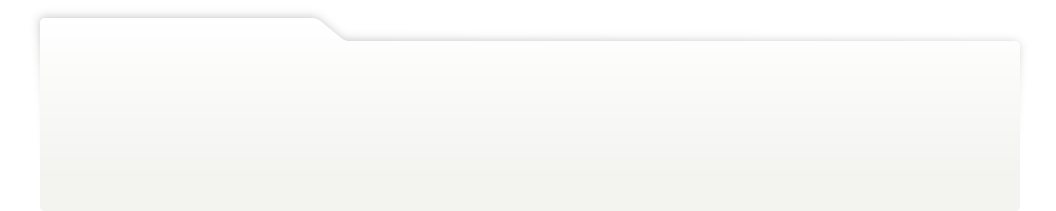
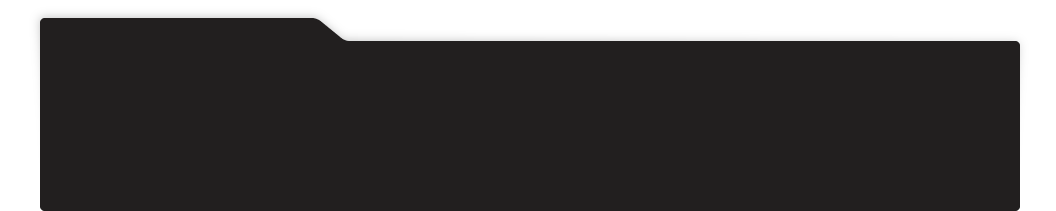
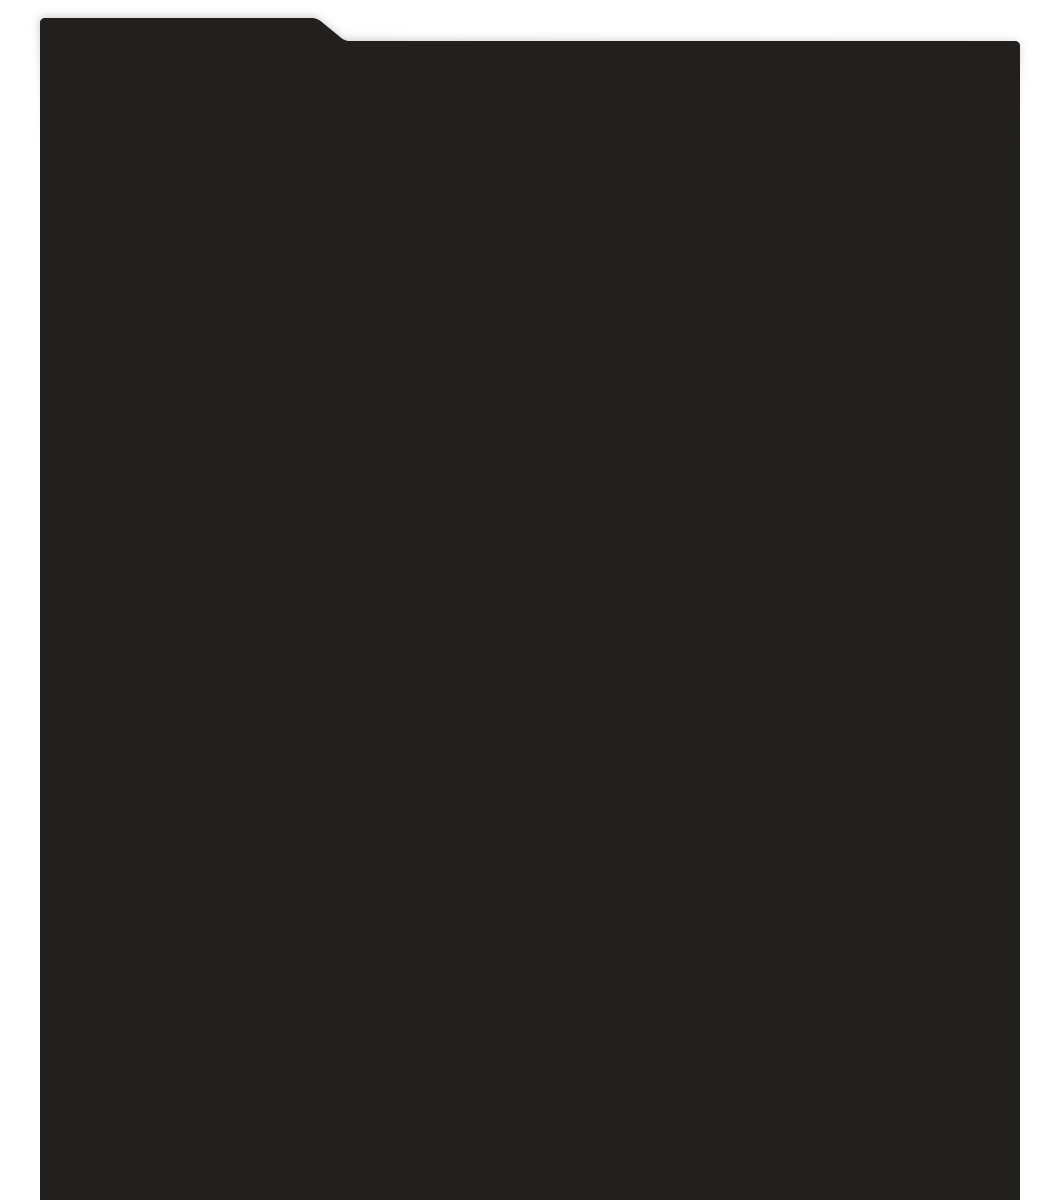
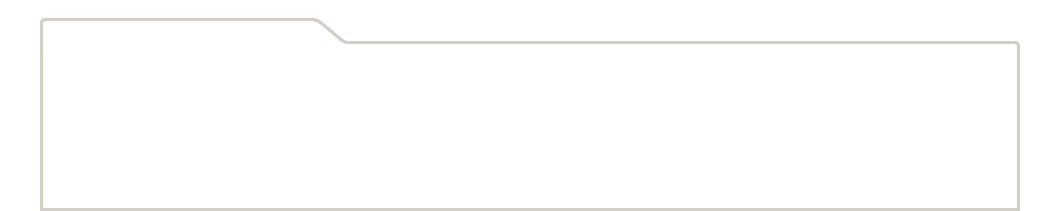
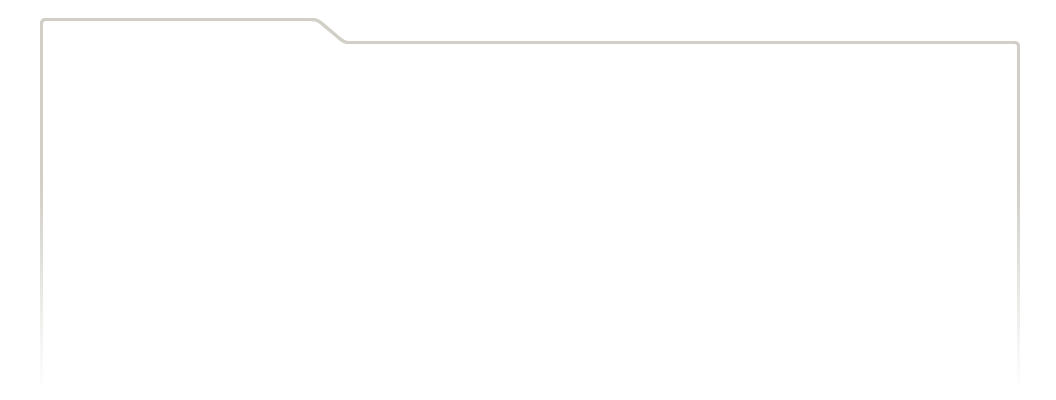
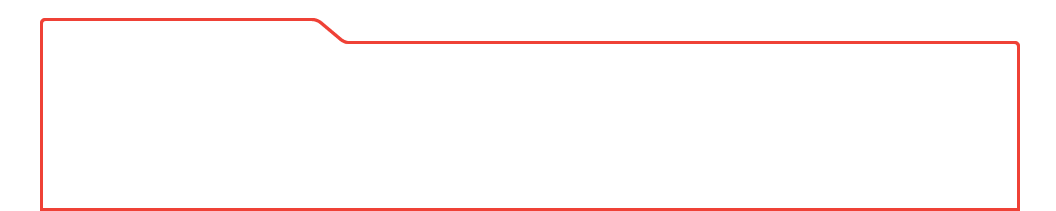
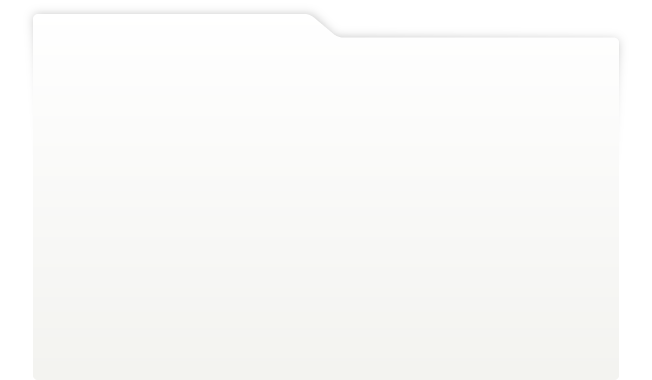
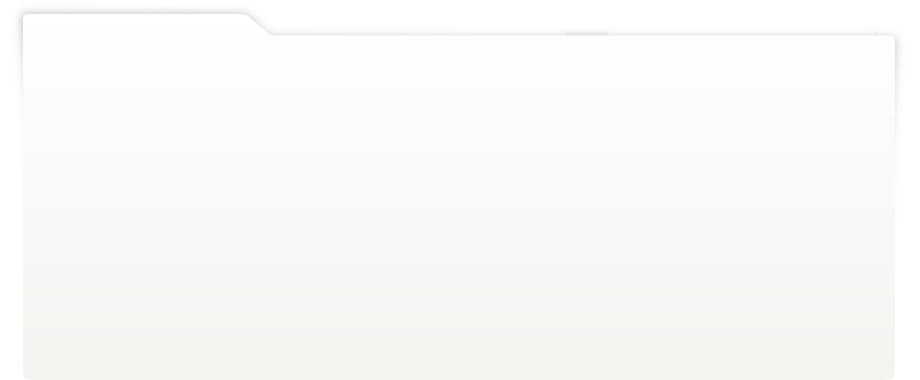
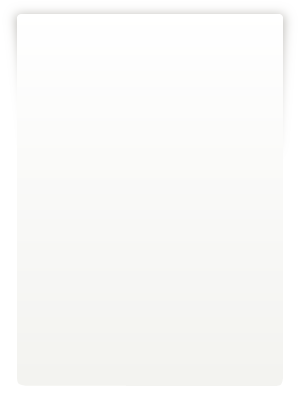
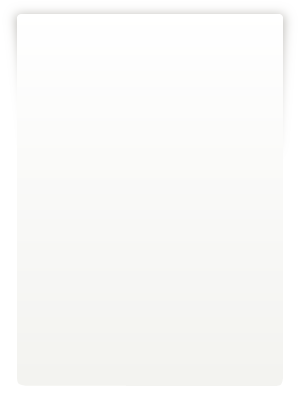
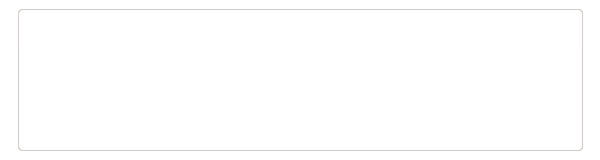
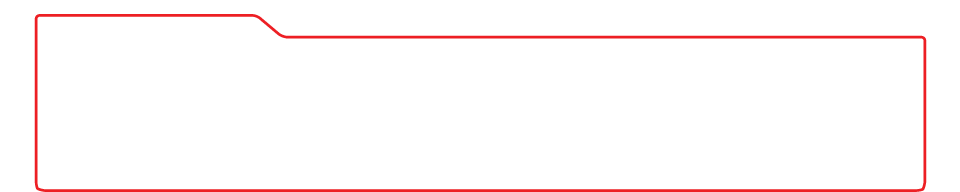
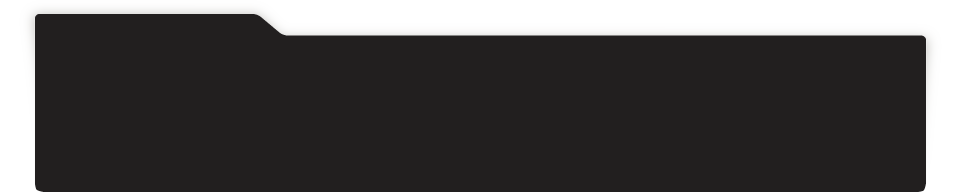
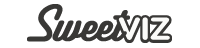
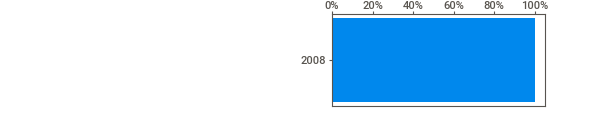
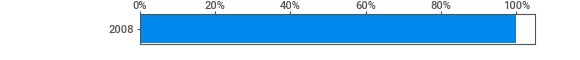
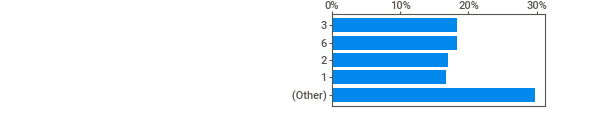
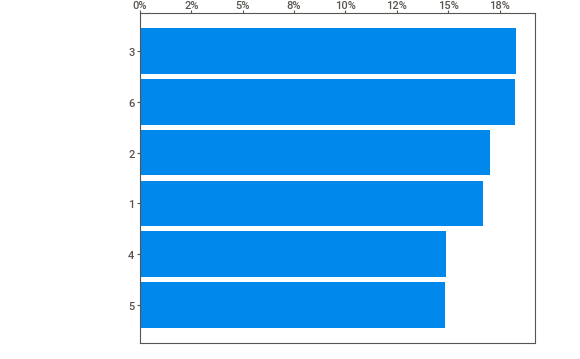
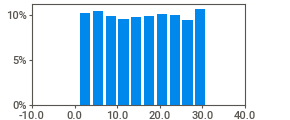
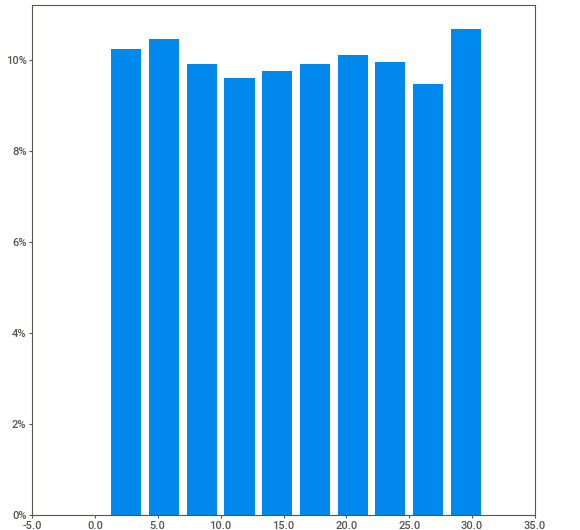
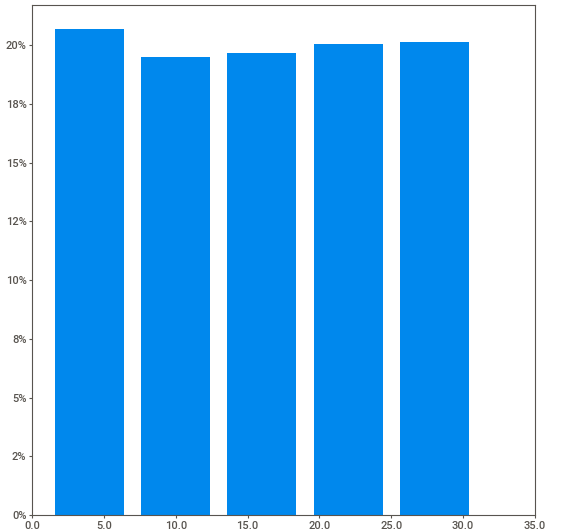
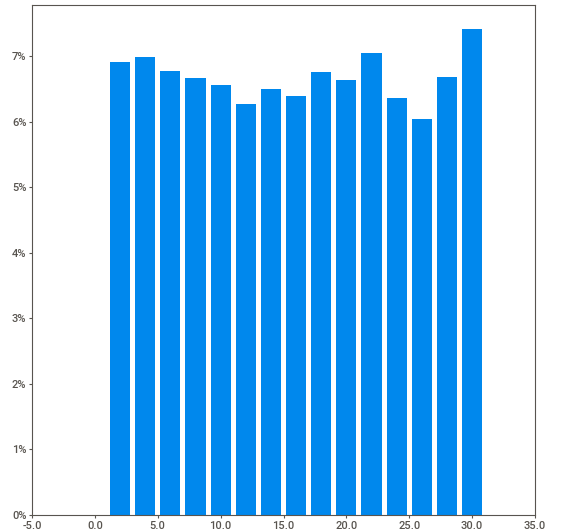
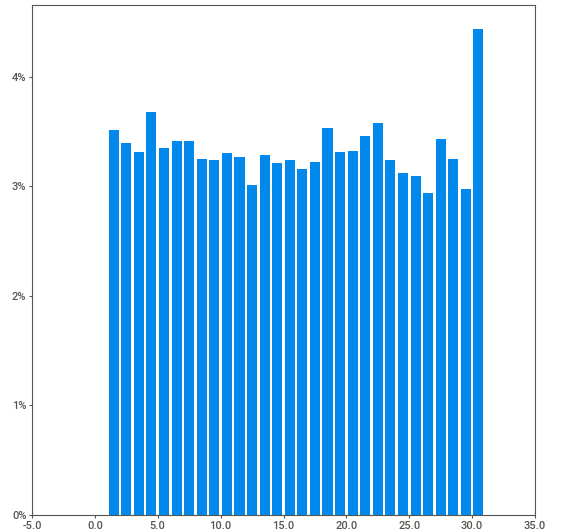
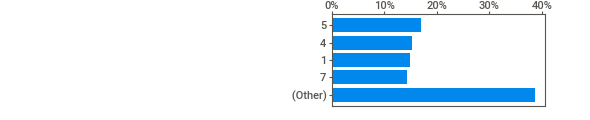
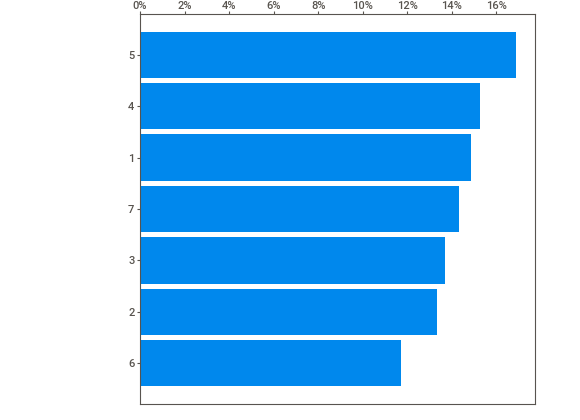
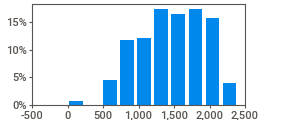
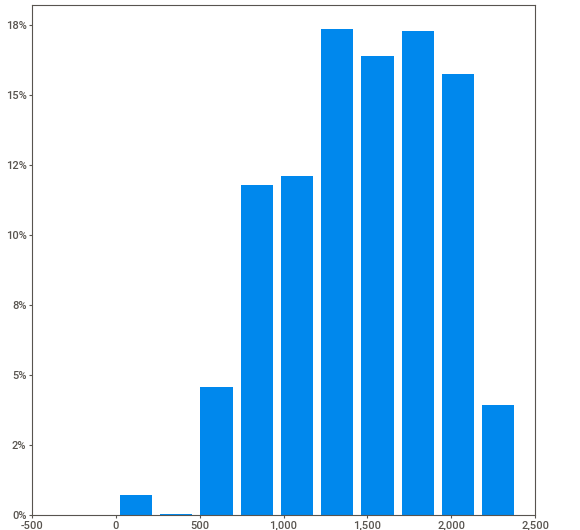
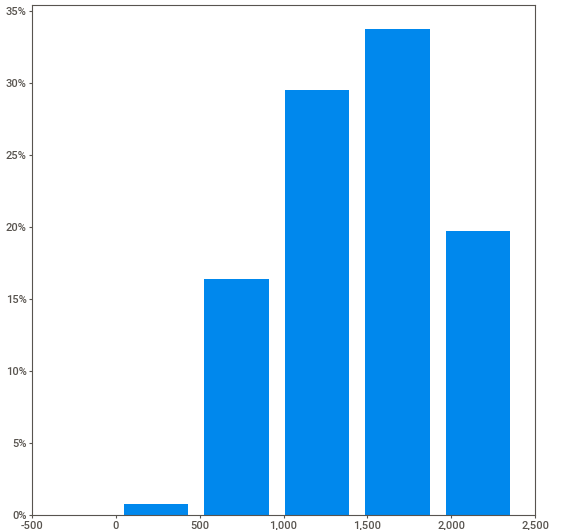
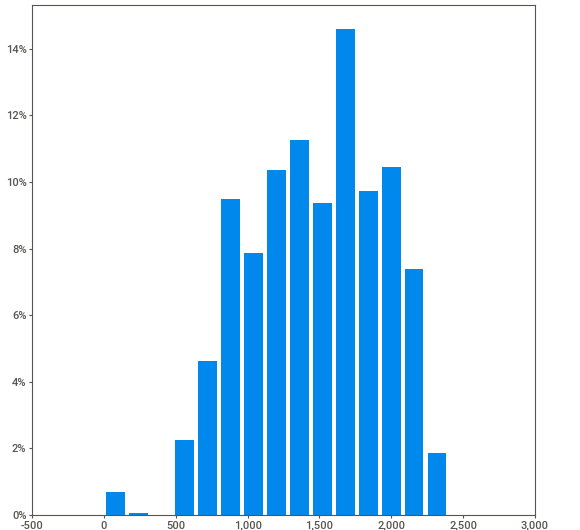
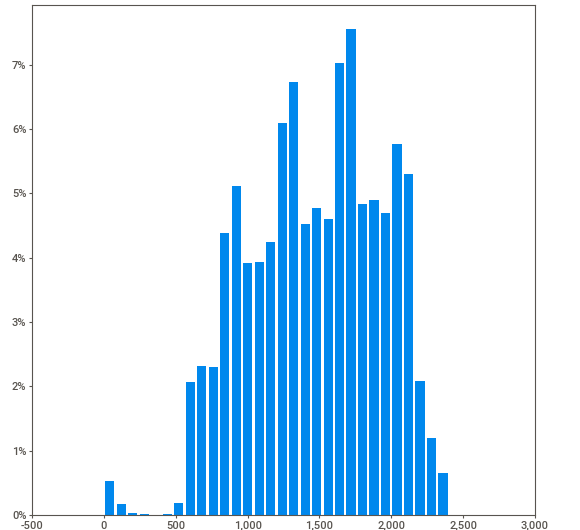
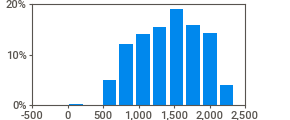
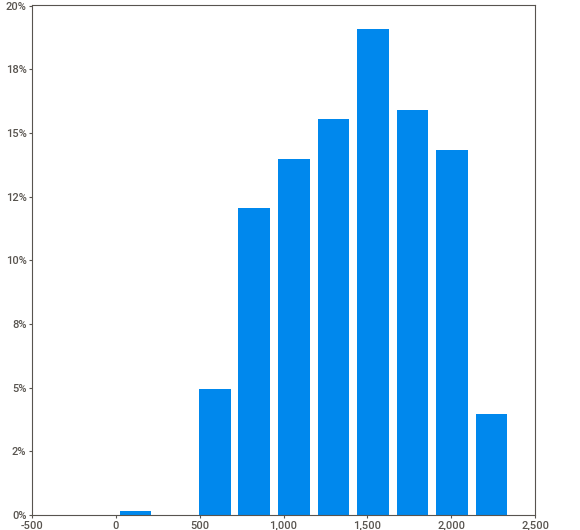
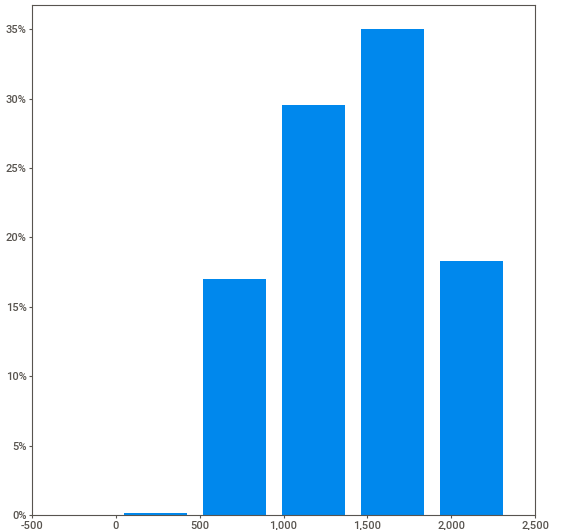
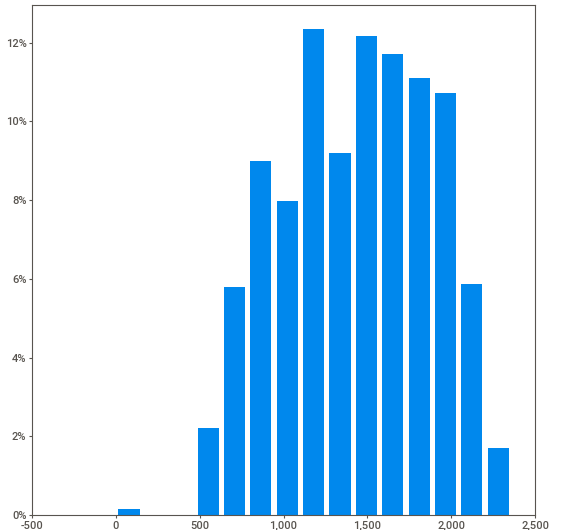
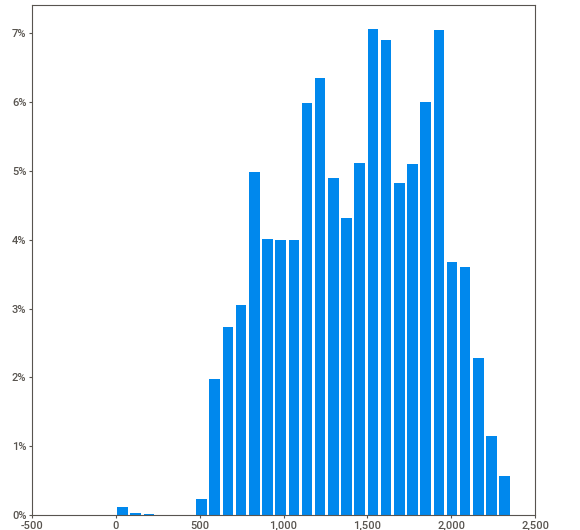
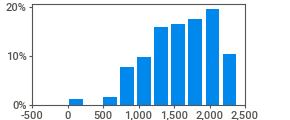
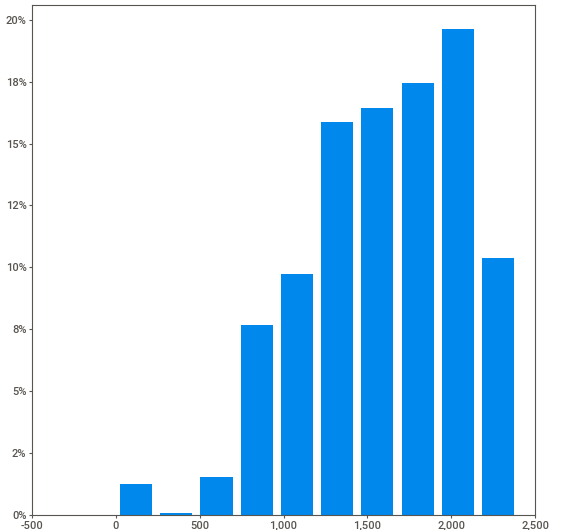
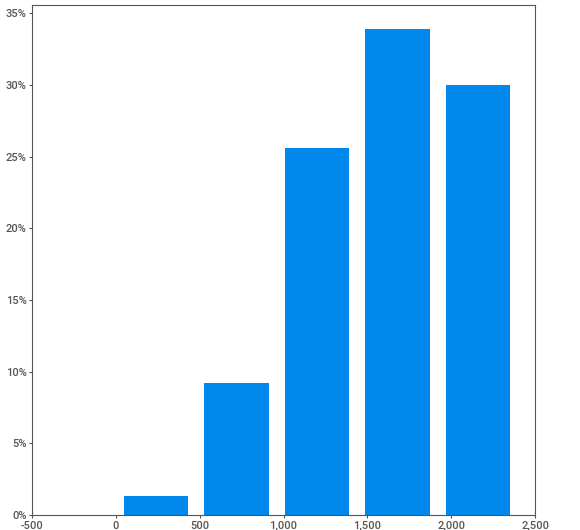
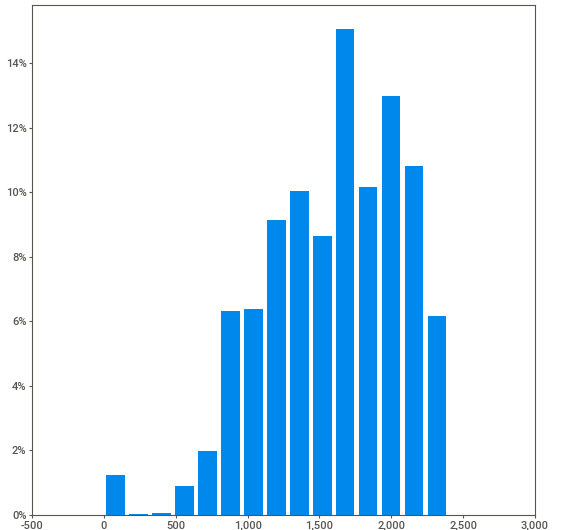
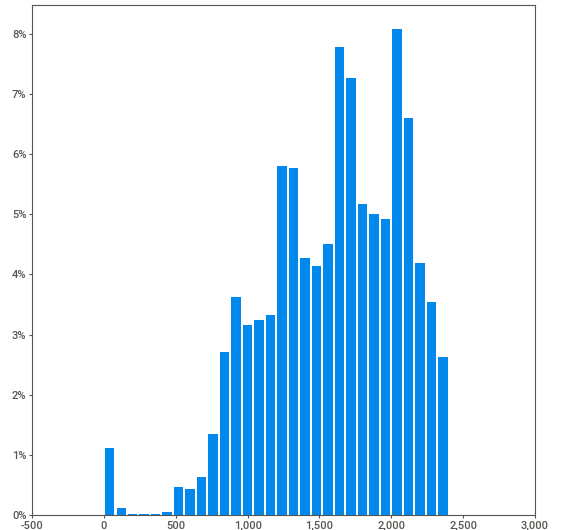
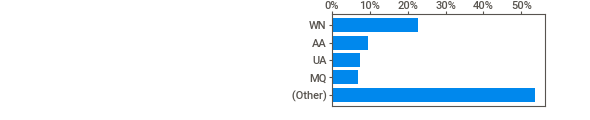
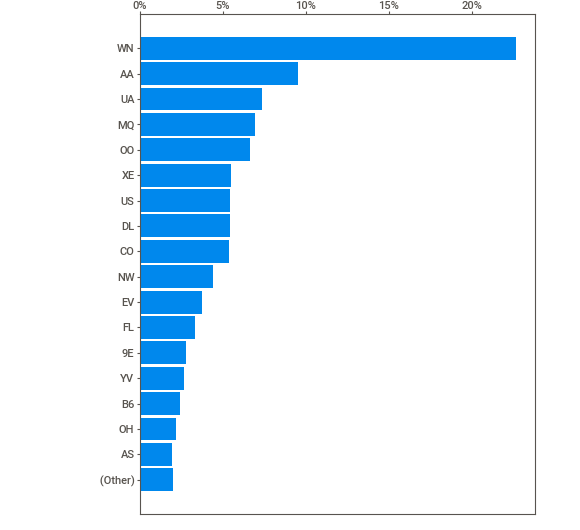
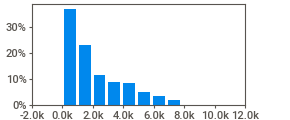
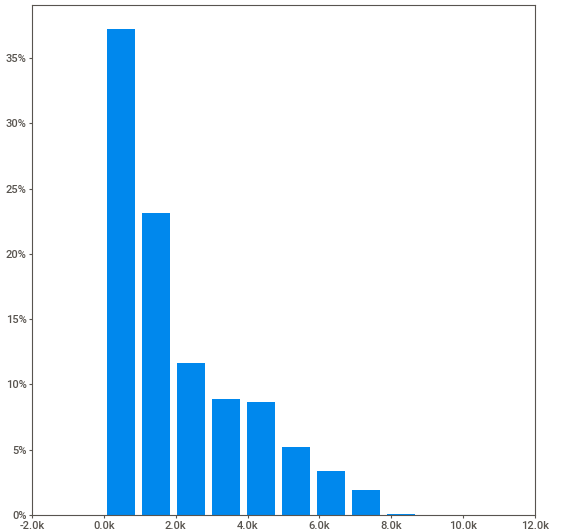
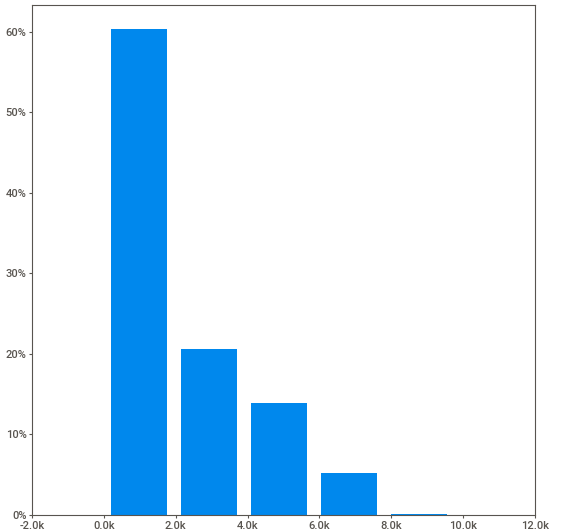
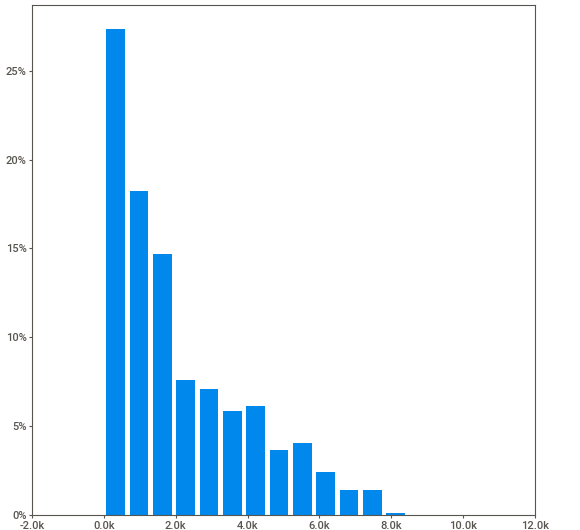
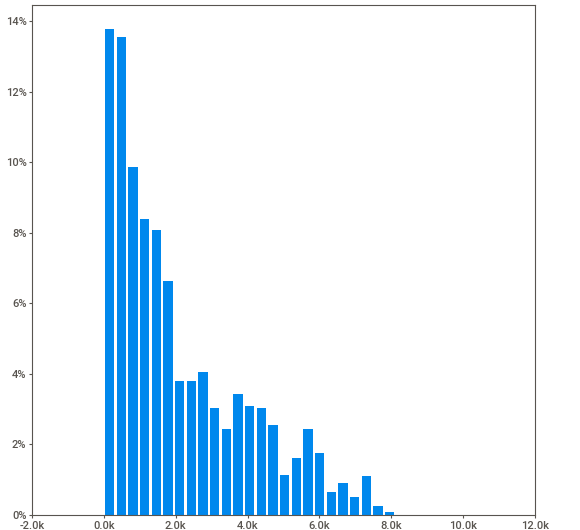
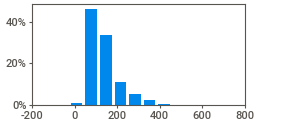
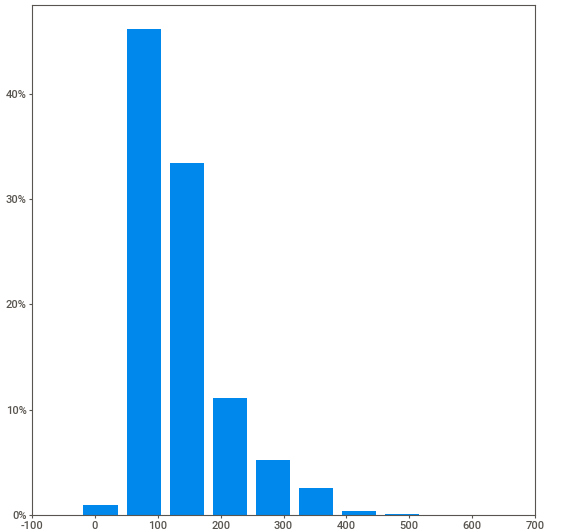
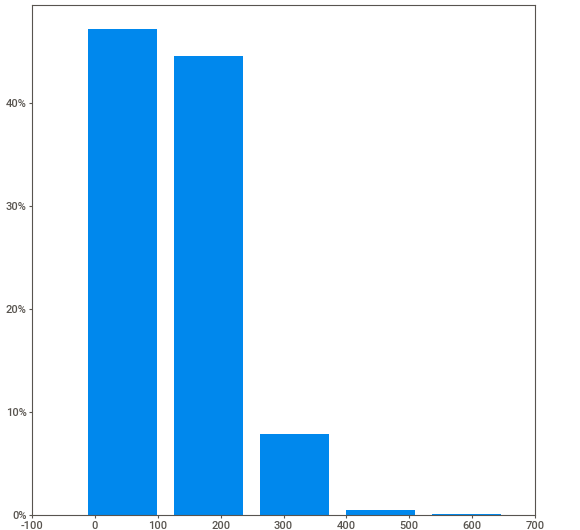
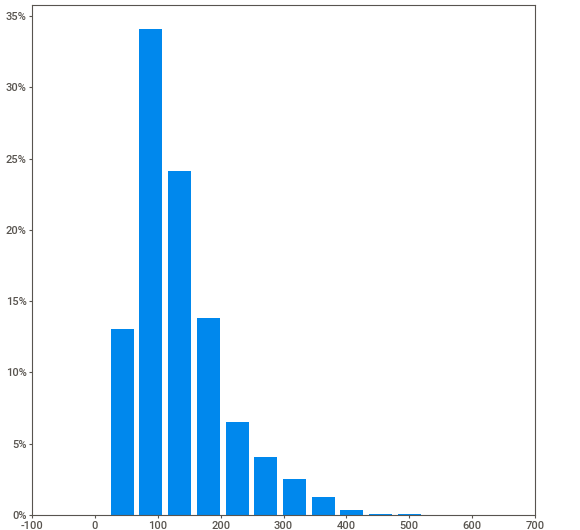
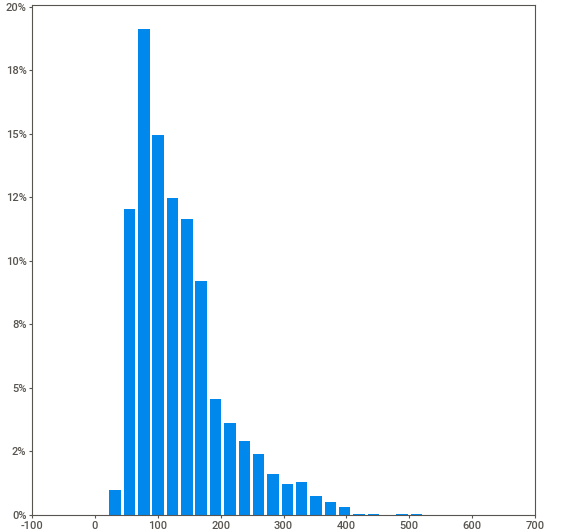
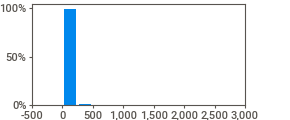
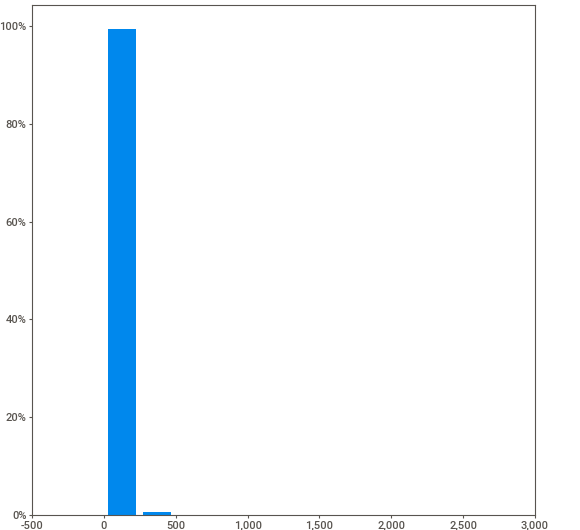
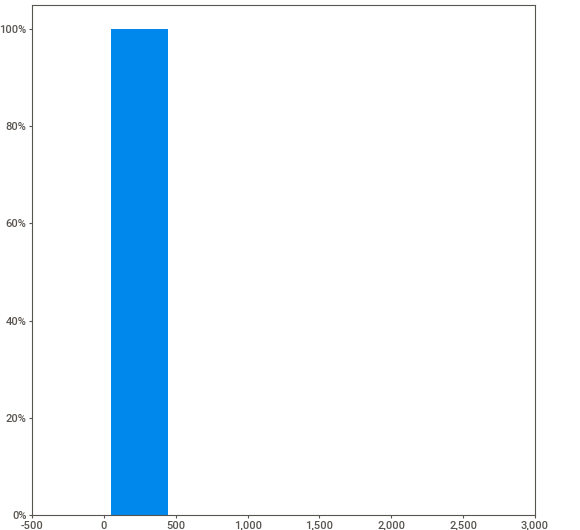
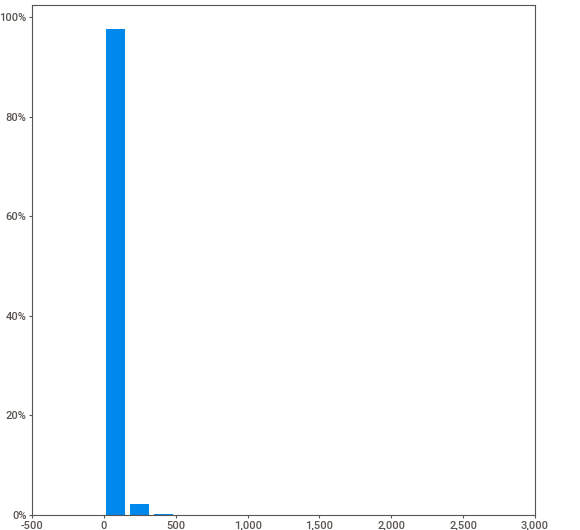
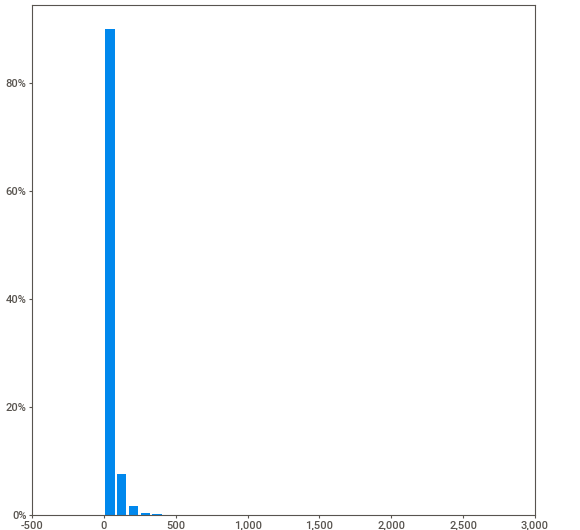
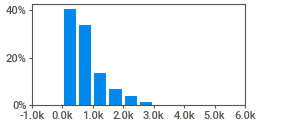
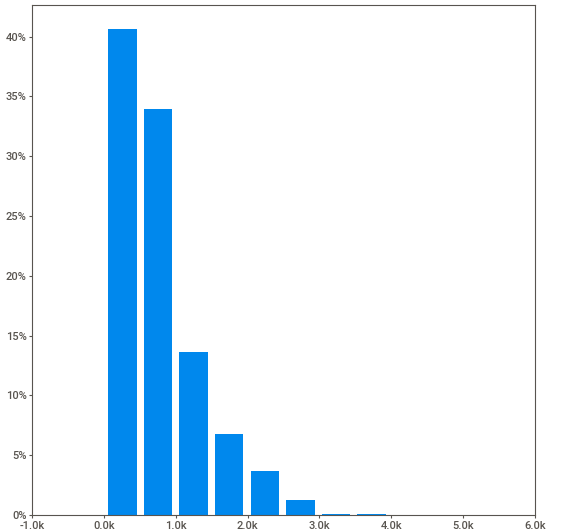
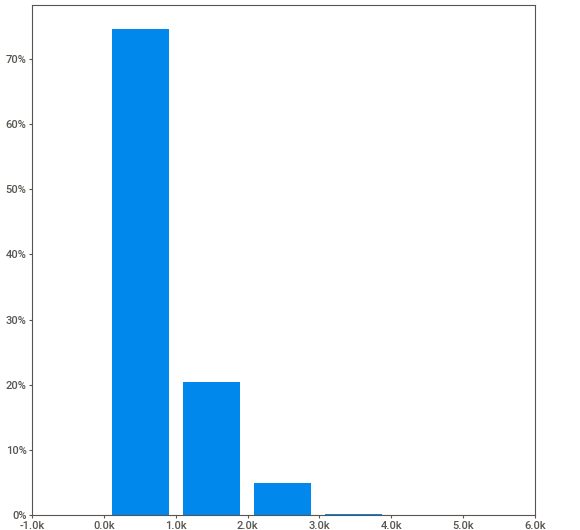
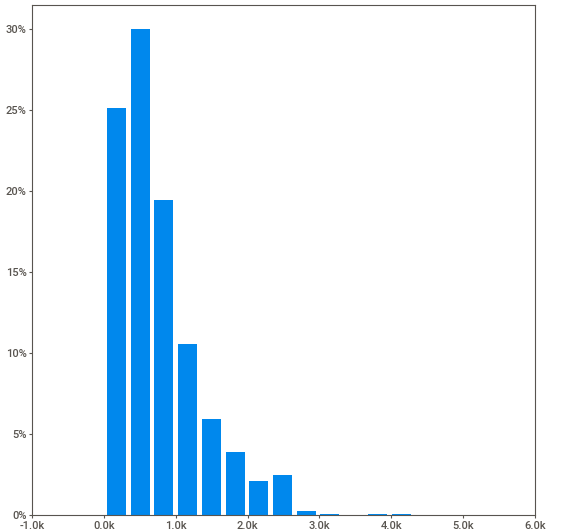
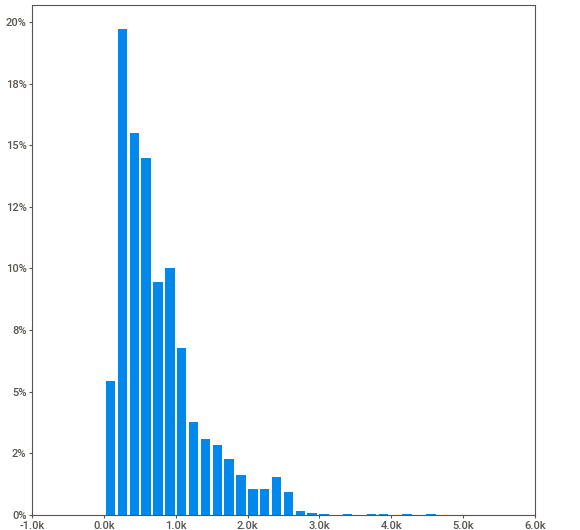
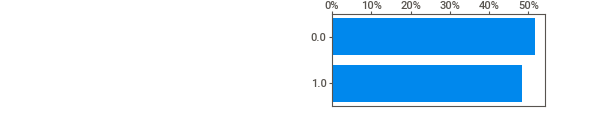
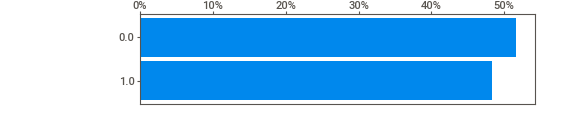
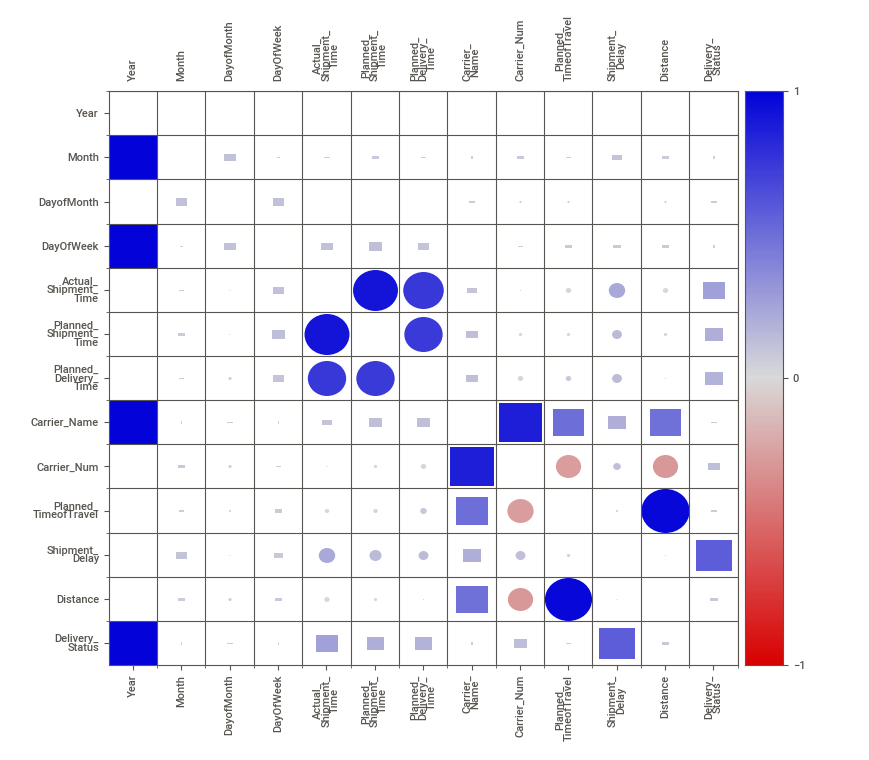
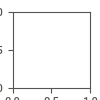

In [19]:
reporte = sweetviz.analyze(data)
reporte.show_notebook()

#### Limpieza de nulos ####

In [245]:
data.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
Actual_Shipment_Time       0
Planned_Shipment_Time      0
Planned_Delivery_Time      0
Carrier_Name               0
Carrier_Num                0
Planned_TimeofTravel     191
Shipment_Delay             0
Source                     0
Destination                0
Distance                   0
Delivery_Status            0
dtype: int64

In [246]:
data.shape

(1485174, 15)

In [247]:
data_sin_na = (data.dropna()).copy()

In [248]:
data_sin_na.shape

(1484983, 15)

In [249]:
data_sin_na.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
Actual_Shipment_Time     0
Planned_Shipment_Time    0
Planned_Delivery_Time    0
Carrier_Name             0
Carrier_Num              0
Planned_TimeofTravel     0
Shipment_Delay           0
Source                   0
Destination              0
Distance                 0
Delivery_Status          0
dtype: int64

#### Eliminacion de columnas que no sirven ####

In [250]:
import seaborn as sns

<AxesSubplot:>

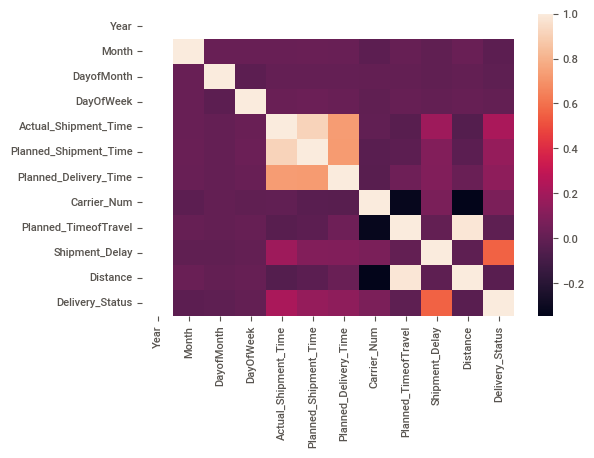

In [251]:
sns.heatmap(data_sin_na.corr())

In [252]:
data_sin_na.corr()['Delivery_Status'].apply(lambda x: np.abs(x)).sort_values(ascending = False)

Delivery_Status          1.000000
Shipment_Delay           0.553742
Actual_Shipment_Time     0.218031
Planned_Shipment_Time    0.155249
Planned_Delivery_Time    0.134765
Carrier_Num              0.079117
Distance                 0.031277
Month                    0.019999
Planned_TimeofTravel     0.017215
DayofMonth               0.016465
DayOfWeek                0.001846
Year                          NaN
Name: Delivery_Status, dtype: float64

In [253]:
data_sin_na.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Carrier_Num', 'Planned_TimeofTravel', 'Shipment_Delay', 'Source',
       'Destination', 'Distance', 'Delivery_Status'],
      dtype='object')

In [254]:
data_sin_na.shape

(1484983, 15)

In [255]:
data_sin_na.drop(columns = ['Year', 'Carrier_Num'], inplace = True)
#Year porque toda la data es del mismo año
#'Actual_Shipment_Time', 'Planned_Shipment_Time','Planned_Delivery_Time'
#Actual_Shipment_Time y Planned_Shipment_Time eliminados porque la resta de estos 2 es Shipment_Delay
#Carrier_Num eliminado porque ya tenemos el nombre y eso es lo que voy a utilizar

In [256]:
data_sin_na.shape

(1484983, 13)

In [257]:
data_sin_na.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Planned_TimeofTravel', 'Shipment_Delay', 'Source', 'Destination',
       'Distance', 'Delivery_Status'],
      dtype='object')

#### Revision de outliers ####

In [258]:
data_sin_na.describe()

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status
count,1.484983e+06,1.484983e+06,1.484983e+06,1.484983e+06,1.484983e+06,1.484983e+06,1.484983e+06,1.484983e+06,1.484983e+06,1.484983e+06
mean,3.489202e+00,1.550978e+01,3.984052e+00,1.468204e+03,1.430676e+03,1.596853e+03,1.343331e+02,3.202415e+01,7.712527e+02,4.835705e-01
std,1.727388e+00,8.795583e+00,1.983073e+00,4.602456e+02,4.381621e+02,4.725187e+02,7.187610e+01,4.836686e+01,5.769275e+02,4.997302e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-2.500000e+01,1.000000e+00,1.100000e+01,0.000000e+00
25%,2.000000e+00,8.000000e+00,2.000000e+00,1.121000e+03,1.100000e+03,1.249000e+03,8.000000e+01,5.000000e+00,3.400000e+02,0.000000e+00
50%,3.000000e+00,1.600000e+01,4.000000e+00,1.509000e+03,1.445000e+03,1.640000e+03,1.160000e+02,1.500000e+01,6.110000e+02,0.000000e+00
75%,5.000000e+00,2.300000e+01,6.000000e+00,1.837000e+03,1.800000e+03,2.000000e+03,1.650000e+02,3.900000e+01,1.009000e+03,1.000000e+00
max,6.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.359000e+03,6.600000e+02,2.467000e+03,4.962000e+03,1.000000e+00


In [259]:
data_sin_na.skew()

C:\Users\tllt1\AppData\Local\Temp\ipykernel_4092\2211770360.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_sin_na.skew()


Month                    0.050859
DayofMonth               0.022060
DayOfWeek               -0.006358
Actual_Shipment_Time    -0.263911
Planned_Shipment_Time   -0.144323
Planned_Delivery_Time   -0.577916
Planned_TimeofTravel     1.413157
Shipment_Delay           4.890680
Distance                 1.518899
Delivery_Status          0.065753
dtype: float64

C:\Users\tllt1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Planned_TimeofTravel'>

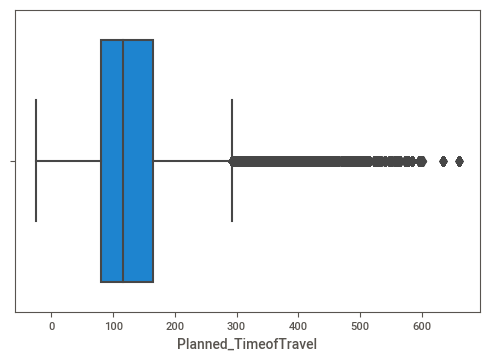

In [260]:
sns.boxplot(data_sin_na['Planned_TimeofTravel'])

In [261]:
q1 = np.percentile(data_sin_na.Planned_TimeofTravel, 25)
q3 = np.percentile(data_sin_na.Planned_TimeofTravel, 75)
iqr = q3 - q1
maximo = q3 + 1.5 * iqr
minimo = q1 - 1.5 * iqr
print(minimo, maximo)

-47.5 292.5


In [262]:
outliers_planned_time = (data_sin_na.Planned_TimeofTravel < minimo) | (data_sin_na.Planned_TimeofTravel > maximo)
sum(outliers_planned_time)

65431

C:\Users\tllt1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shipment_Delay'>

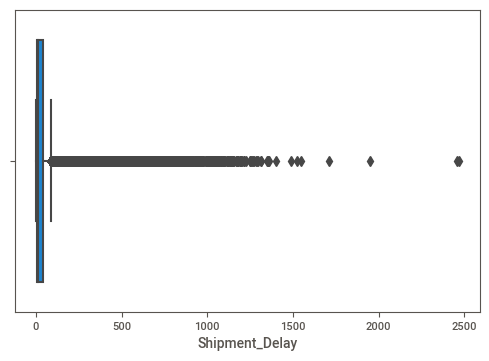

In [263]:
sns.boxplot(data_sin_na['Shipment_Delay'])

In [264]:
q1 = np.percentile(data_sin_na.Shipment_Delay, 25)
q3 = np.percentile(data_sin_na.Shipment_Delay, 75)
iqr = q3 - q1
maximo = q3 + 1.5 * iqr
minimo = q1 - 1.5 * iqr
print(minimo, maximo)

-46.0 90.0


In [265]:
outliers_Shipment_Delay = (data_sin_na.Shipment_Delay < minimo) | (data_sin_na.Shipment_Delay > maximo)
sum(outliers_Shipment_Delay)

130035

C:\Users\tllt1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance'>

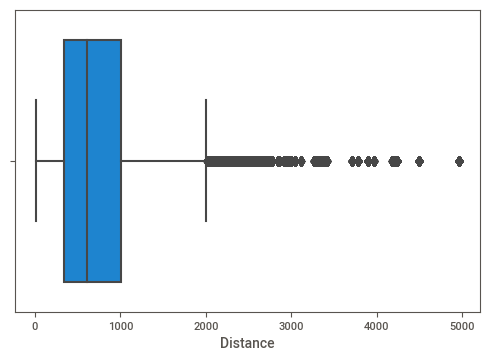

In [266]:
sns.boxplot(data_sin_na['Distance'])

In [267]:
q1 = np.percentile(data_sin_na.Distance, 25)
q3 = np.percentile(data_sin_na.Distance, 75)
iqr = q3 - q1
maximo = q3 + 1.5 * iqr
minimo = q1 - 1.5 * iqr
print(minimo, maximo)

-663.5 2012.5


In [268]:
outliers_Distance = (data_sin_na.Distance < minimo) | (data.Distance > maximo)
sum(outliers_Distance)

73402

In [269]:
data_sin_na.shape

(1484983, 13)

In [270]:
(data_sin_na['Shipment_Delay'] < 0).value_counts()

False    1484983
Name: Shipment_Delay, dtype: int64

##### Winsorizer #####

In [271]:
from feature_engine.outliers import Winsorizer

In [272]:
winsor= Winsorizer(capping_method ='iqr',
                 tail ='both',
                 fold =1.5,
                 variables = ['Planned_TimeofTravel'])
data_sin_na['Planned_TimeofTravel'] = winsor.fit_transform(data_sin_na[['Planned_TimeofTravel']])

C:\Users\tllt1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Planned_TimeofTravel'>

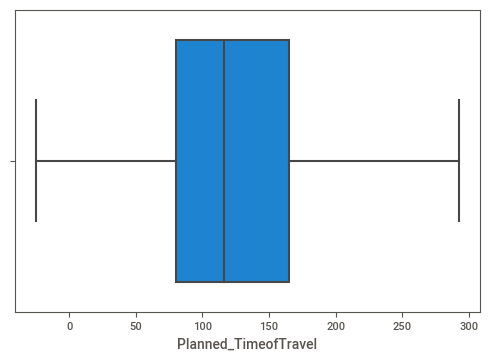

In [273]:
sns.boxplot(data_sin_na['Planned_TimeofTravel'])

In [274]:
winsor= Winsorizer(capping_method ='iqr',
                 tail ='both',
                 fold =1.5,
                 variables = ['Shipment_Delay'])
data_sin_na['Shipment_Delay'] = winsor.fit_transform(data_sin_na[['Shipment_Delay']])

C:\Users\tllt1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shipment_Delay'>

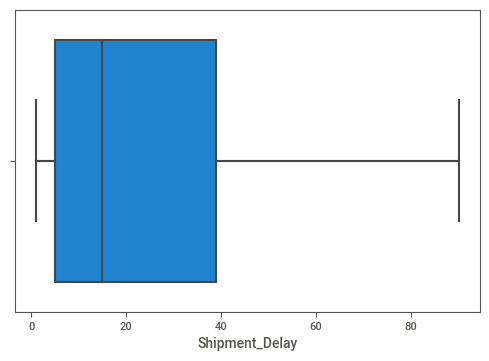

In [275]:
sns.boxplot(data_sin_na['Shipment_Delay'])

In [276]:
winsor= Winsorizer(capping_method ='iqr',
                 tail ='both',
                 fold =1.5,
                 variables = ['Distance'])
data_sin_na['Distance'] = winsor.fit_transform(data_sin_na[['Distance']])

C:\Users\tllt1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance'>

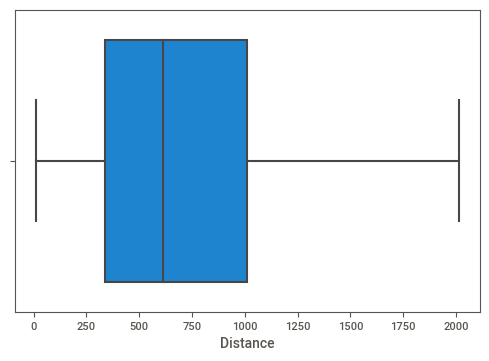

In [277]:
sns.boxplot(data_sin_na['Distance'])

#### Strating Sampling ####

In [278]:
data_sin_na.Delivery_Status.value_counts()
# 0 = (766889/(766889+718094)) = 0.5164294810108937 = 51.61%
# 1 = (718094/(718094+766889)) = 0.48357051898910625 = 48.35%

0.0    766889
1.0    718094
Name: Delivery_Status, dtype: int64

In [279]:
data_sample = (data_sin_na.groupby('Delivery_Status', group_keys=False).apply(lambda x: x.sample(frac=0.5))).copy()

In [280]:
data_sample.Delivery_Status.value_counts()
# 0 = (383444/(383444+359047)) = 0.5164291553702335 =51.64%
# 1 = 359047/(359047+383444) = 0.48357084462976657 = 48.35%

0.0    383444
1.0    359047
Name: Delivery_Status, dtype: int64

In [281]:
data_sample.reset_index(inplace=True)
data_sample.drop(['index'],axis=1,inplace=True)
data_sample.head()

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,5,5,1,1152.0,1150,1317,F9,147.0,2.0,DEN,SMF,910.0,0.0
1,1,14,1,946.0,945,1128,YV,103.0,1.0,PHX,COS,551.0,0.0
2,1,10,4,1617.0,1610,1725,WN,75.0,7.0,BWI,MHT,377.0,0.0
3,5,8,4,956.0,950,1115,WN,85.0,6.0,LAX,SFO,337.0,0.0
4,4,11,5,634.0,630,645,MQ,75.0,4.0,SDF,ORD,286.0,0.0


#### Agregando Delay_cat para utlizar los rangos ####

In [283]:
data_limpio = data_sample.copy()
data_limpio.head(5)

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,5,5,1,1152.0,1150,1317,F9,147.0,2.0,DEN,SMF,910.0,0.0
1,1,14,1,946.0,945,1128,YV,103.0,1.0,PHX,COS,551.0,0.0
2,1,10,4,1617.0,1610,1725,WN,75.0,7.0,BWI,MHT,377.0,0.0
3,5,8,4,956.0,950,1115,WN,85.0,6.0,LAX,SFO,337.0,0.0
4,4,11,5,634.0,630,645,MQ,75.0,4.0,SDF,ORD,286.0,0.0


In [134]:
data_limpio['Delay_brackets'] = data_limpio.Shipment_Delay

In [284]:
data_limpio.to_csv('data_limpio.csv', index=False)

In [135]:
data_limpio.head(2)

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status,Delay_brackets
0,5,7,3,1925.0,1923,2052,NW,89.0,2.0,DTW,DCA,405.0,0.0,2.0
1,1,17,4,1428.0,1421,1620,NW,119.0,7.0,LGA,DTW,501.0,0.0,7.0


In [136]:
data_limpio.Shipment_Delay.value_counts()

90.0    66855
1.0     59444
2.0     44469
3.0     36624
4.0     30980
        ...  
83.0     1339
86.0     1253
87.0     1234
89.0     1222
88.0     1190
Name: Shipment_Delay, Length: 90, dtype: int64

###### Funcion para cambiar shipment delay como categorica ######

In [54]:
#def delay_convert(num):
    #num= (num)
        
#    if num > 0 and num <= 5:
#        num = 'Retardo_5'
#        return num
    
#    if num > 5.0 and num <= 10:
#        num = 'Retardo_10'
#        return num
    
#    if num > 10.0 and num <= 15:
#        num = 'Retardo_15'
#        return num
    
#    if num > 15.0 and num <= 20:
#        num = 'Retardo_20'
#        return num
    
#    if num > 20.0 and num <= 25:
#        num = 'Retardo_25'
#        return num
    
#    if num > 25:
#        num = 'Retardo_25+'
#        return num
    
#    else:
#        return num

In [55]:
#data_limpio.Delay_cat = data_limpio.Delay_cat.apply(delay_convert)
#data_limpio.Delay_cat.value_counts()

Antes_planeado    880597
Retardo_25+       261600
Retardo_5         201182
En_tiempo         138040
Retardo_10        108231
Retardo_15         73986
Retardo_20         55022
Retardo_25         42425
Name: Delay_cat, dtype: int64

###### Funcion para poner shipment delay en rangos ######

In [137]:
def delay_convert(num):
    #num= (num)
   
    if num <= 10:
        num = 10
        return num
    
    if num > 10.1 and num <= 20:
        num = 20
        return num
    
    if num > 20.1 and num <= 30:
        num = 30
        return num
    
    if num > 30.1 and num <= 40:
        num = 40
        return num
    
    if num > 40.1 and num <= 50:
        num = 50
        return num
    
    if num > 50.1 and num <= 60:
        num = 50
        return num
    
    if num > 60.1 and num <= 70:
        num = 70
        return num    
    
    if num > 70.1 and num <= 80:
        num = 80
        return num
    
    if num > 80.1:
        num = 81
        return num
    
    else:
        return num

In [138]:
data_limpio.Delay_brackets = data_limpio.Delay_brackets.apply(delay_convert)
data_limpio.Delay_brackets.value_counts()

10    309314
20    128841
81     78794
30     76160
50     62584
40     49464
70     20777
80     16557
Name: Delay_brackets, dtype: int64

In [139]:
data_limpio.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Planned_TimeofTravel', 'Shipment_Delay', 'Source', 'Destination',
       'Distance', 'Delivery_Status', 'Delay_brackets'],
      dtype='object')

In [140]:
data_limpio.dtypes

Month                      int64
DayofMonth                 int64
DayOfWeek                  int64
Actual_Shipment_Time     float64
Planned_Shipment_Time      int64
Planned_Delivery_Time      int64
Carrier_Name              object
Planned_TimeofTravel     float64
Shipment_Delay           float64
Source                    object
Destination               object
Distance                 float64
Delivery_Status          float64
Delay_brackets             int64
dtype: object

In [141]:
data_limpio.isnull().sum()

Month                    0
DayofMonth               0
DayOfWeek                0
Actual_Shipment_Time     0
Planned_Shipment_Time    0
Planned_Delivery_Time    0
Carrier_Name             0
Planned_TimeofTravel     0
Shipment_Delay           0
Source                   0
Destination              0
Distance                 0
Delivery_Status          0
Delay_brackets           0
dtype: int64

In [142]:
data_limpio.shape

(742491, 14)

In [59]:
#data_limpio.to_csv('data_limpio.csv', index=False)

In [145]:
data_limpio.drop(columns = ['Shipment_Delay'], inplace = True)

In [146]:
data_limpio.shape

(742491, 13)

In [147]:
data_limpio.corr()['Delivery_Status'].apply(lambda x: np.abs(x)).sort_values(ascending = False)

Delivery_Status          1.000000
Delay_brackets           0.758753
Actual_Shipment_Time     0.218638
Planned_Shipment_Time    0.155733
Planned_Delivery_Time    0.135015
Distance                 0.031348
Month                    0.018972
DayofMonth               0.017859
Planned_TimeofTravel     0.016154
DayOfWeek                0.002561
Name: Delivery_Status, dtype: float64

In [148]:
data_limpio.reset_index(inplace=True)

In [149]:
data_limpio.drop(['index'], axis=1,inplace=True)

In [150]:
data_limpio.head(2)

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Planned_TimeofTravel,Source,Destination,Distance,Delivery_Status,Delay_brackets
0,5,7,3,1925.0,1923,2052,NW,89.0,DTW,DCA,405.0,0.0,10
1,1,17,4,1428.0,1421,1620,NW,119.0,LGA,DTW,501.0,0.0,10


In [151]:
data_limpio.shape

(742491, 13)

#### Instalacion de librerias ####

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import tree
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [77]:
pip install feature-engine

Note: you may need to restart the kernel to use updated packages.


In [78]:
from feature_engine import imputation as imp
from feature_engine import encoding as enc
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.encoding import OneHotEncoder
from feature_engine import imputation as mdi
from feature_engine.encoding import CountFrequencyEncoder

In [117]:
!pip install imblearn

In [79]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC

In [80]:
import graphviz


In [179]:
from sklearn.impute import SimpleImputer

#### Separacion Train / Test ####

In [152]:
X_train, X_test, y_train, y_test = train_test_split(data_limpio.drop(columns = ['Delivery_Status']), data_limpio.Delivery_Status, test_size = 0.2, random_state = 5555)

In [153]:
X_train.shape

(593992, 12)

In [154]:
X_test.shape

(148499, 12)

In [155]:
y_train.shape

(593992,)

In [156]:
y_test.shape

(148499,)

#### Over/Under Sampling ####

In [125]:
#oversampler = RandomOverSampler()
#undersampler = RandomUnderSampler()

In [126]:
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

In [127]:
print('X_train_over shape = ', X_train_over.shape)
print('y_train_over shape = ', y_train_over.shape)
print('y_train_over value counts = ', y_train_over.value_counts())

X_train_over shape =  (2244102, 12)
y_train_over shape =  (2244102,)
y_train_over value counts =  0.0    1122051
1.0    1122051
Name: Delivery_Status, dtype: int64


In [128]:
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [130]:
print('X_train_under shape = ', X_train_under.shape)
print('y_train_under shape = ', y_train_under.shape)
print('y_train_under value counts = ', y_train_under.value_counts())

X_train_under shape =  (573630, 12)
y_train_under shape =  (573630,)
y_train_under value counts =  0.0    286815
1.0    286815
Name: Delivery_Status, dtype: int64


In [132]:
X_train.head(2)

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Planned_TimeofTravel,Source,Destination,Distance,Delay_cat
873541,2,15,5,1035.0,1020,1229,US,129.0,BDL,CLT,644.0,Retardo_15
1391935,5,30,5,740.0,745,1135,AA,230.0,EWR,SJU,1608.0,Antes_planeado


In [134]:
X_train.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Planned_TimeofTravel', 'Source', 'Destination', 'Distance',
       'Delay_cat'],
      dtype='object')

In [ ]:
#cat = [4, 7, 8, 10]
#sm = SMOTENC(categorical_features= cat, random_state=55)
#X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

#### Creacion de modelos #####

In [157]:
data_limpio.Delivery_Status.value_counts()

0.0    383444
1.0    359047
Name: Delivery_Status, dtype: int64

In [158]:
data_limpio.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Planned_TimeofTravel', 'Source', 'Destination', 'Distance',
       'Delivery_Status', 'Delay_brackets'],
      dtype='object')

In [182]:
pipeline_delivery = Pipeline([('escalar', SklearnTransformerWrapper(StandardScaler(), variables=['Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time', 'Planned_Shipment_Time', 'Planned_Delivery_Time',
                                                                                                 'Planned_TimeofTravel', 'Delay_brackets', 'Distance'])),
                               #('one_hot', enc.OneHotEncoder(variables = ['Delay_cat'])), 
                              ('freq_enc', enc.CountFrequencyEncoder(variables = ['Carrier_Name','Source','Destination'], encoding_method='count', unseen = 'encode')),
                                   #('modelo', DecisionTreeClassifier())
                                   ], verbose = True)
pipeline_delivery.fit(X_train, y_train)

[Pipeline] ........... (step 1 of 2) Processing escalar, total=   0.6s
[Pipeline] .......... (step 2 of 2) Processing freq_enc, total=   0.6s


Pipeline(steps=[('escalar',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['Month', 'DayofMonth',
                                                      'DayOfWeek',
                                                      'Actual_Shipment_Time',
                                                      'Planned_Shipment_Time',
                                                      'Planned_Delivery_Time',
                                                      'Planned_TimeofTravel',
                                                      'Delay_brackets',
                                                      'Distance'])),
                ('freq_enc',
                 CountFrequencyEncoder(unseen='encode',
                                       variables=['Carrier_Name', 'Source',
                                                  'Destination']))],
         verbose=True)

In [183]:
X_train_transformed = pipeline_delivery.transform(X_train)

In [184]:
X_train_transformed.head(3)

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Planned_TimeofTravel,Source,Destination,Distance,Delay_brackets
393033,-1.441137,0.964790,0.007518,-0.767403,-0.855717,-0.778819,40796,0.336763,983,31250,-0.053381,-0.404047
519470,1.452068,-0.057189,1.520952,-0.494011,-0.474970,-0.558633,43750,-0.016190,22311,3728,0.132598,-0.404047
488224,0.873427,-0.057189,0.007518,0.310975,0.193045,0.267064,21957,-0.062227,229,28750,-0.113436,0.820855


In [185]:
X_train.head(3)

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Planned_TimeofTravel,Source,Destination,Distance,Delay_brackets
393033,1,24,4,1114.0,1055,1229,MQ,154.0,ALB,ORD,723.0,20
519470,6,15,7,1240.0,1222,1333,UA,131.0,DEN,ONT,819.0,20
488224,5,15,4,1611.0,1515,1723,EV,128.0,ABE,ATL,692.0,50


##### Logistic Regression #####

In [95]:
logreg = LogisticRegression()

In [96]:
regression = logreg.fit(X_train_transformed, y_train)

In [97]:
pred_train = regression.predict(X_train_transformed)
pred_train

array([1., 0., 1., ..., 0., 0., 1.])

In [98]:
pred_train_probas = regression.predict_proba(X_train_transformed)[:,1]
pred_train_probas

array([0.518829  , 0.49367064, 0.53145649, ..., 0.4974306 , 0.391018  ,
       0.50549798])

In [100]:
metrics.roc_auc_score(y_train, pred_train)

0.5318980458282248

In [101]:
metrics.roc_auc_score(y_train, pred_train_probas)

0.5474568627013401

In [102]:
regression_test = pipeline_delivery.transform(X_test)

C:\Users\tllt1\anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:210: UserWarning: During the encoding, NaN values were introduced in the feature(s) Destination.
  warnings.warn(


In [104]:
#pred_simple_regression_test = regression.predict(regression_test)

In [106]:

#pred_proba_regression_test = regression.predict_proba(regression_test)

In [208]:
#metrics.plot_confusion_matrix(logreg, X_train_transformed, y_train_over)

In [258]:
metrics.roc_auc_score(y_test, pred_simple_regression_test)

1.0

In [259]:
metrics.roc_auc_score(y_test, pred_proba_regression_test[:,1])

1.0

##### Tree Classifier #####

In [107]:
dec_tree = DecisionTreeClassifier()
params = {'splitter':['random', 'best'], 'max_depth' : [50, 100, 150], 'random_state':[525]}
cvtree = GridSearchCV(dec_tree, params).fit(X_train_transformed, y_train)# X_TRAIN = DATA

In [108]:
cvtree.best_estimator_

DecisionTreeClassifier(max_depth=50, random_state=525, splitter='random')

In [186]:
tree_classifier_full = DecisionTreeClassifier(splitter = 'random',  max_depth = 50, random_state=525).fit(X_train_transformed, y_train)

In [187]:
tree_classifier_full.feature_importances_

array([0.00293568, 0.00547121, 0.00426017, 0.07685852, 0.05762571,
       0.00394534, 0.00262872, 0.00389759, 0.00416789, 0.00416631,
       0.00404934, 0.82999353])

In [188]:
tree_classifier_full.feature_names_in_

array(['Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Planned_TimeofTravel', 'Source', 'Destination', 'Distance',
       'Delay_brackets'], dtype=object)

In [226]:
importances = pd.DataFrame(data = {'attribute': tree_classifier_full.feature_names_in_, 'importance': tree_classifier_full.feature_importances_})
importances = importances.sort_values(by= 'importance', ascending=False)
importances

,attribute,importance
11,Delay_brackets,0.829994
3,Actual_Shipment_Time,0.076859
4,Planned_Shipment_Time,0.057626
1,DayofMonth,0.005471
2,DayOfWeek,0.004260
8,Source,0.004168
9,Destination,0.004166
10,Distance,0.004049
5,Planned_Delivery_Time,0.003945
7,Planned_TimeofTravel,0.003898


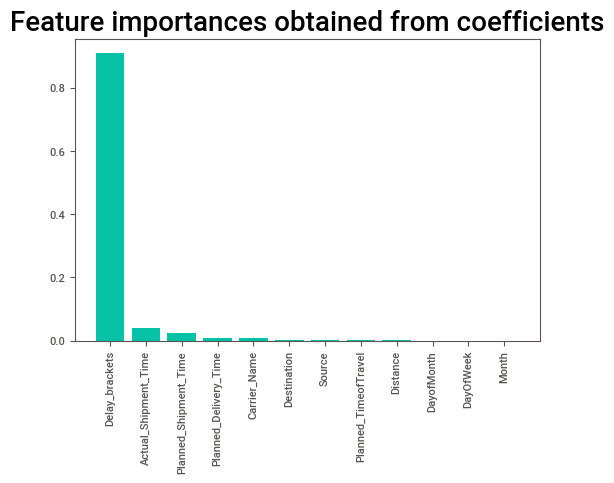

In [293]:
plt.bar(x=importances['attribute'], height=importances['importance'], color='#06C2A6')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [190]:
pred_simple = tree_classifier_full.predict(X_train_transformed)
pred_simple

array([1., 1., 1., ..., 0., 0., 0.])

In [191]:
predict_probas = tree_classifier_full.predict_proba(X_train_transformed)
predict_probas

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [192]:
sklearn.metrics.roc_auc_score(y_train, predict_probas[:,1])

1.0

In [193]:
metrics.accuracy_score(y_train, pred_simple)

1.0

In [194]:
test_tree = pipeline_delivery.transform(X_test)

In [195]:
X_test.isnull()

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Planned_TimeofTravel,Source,Destination,Distance,Delay_brackets
138655,False,False,False,False,False,False,False,False,False,False,False,False
592406,False,False,False,False,False,False,False,False,False,False,False,False
28583,False,False,False,False,False,False,False,False,False,False,False,False
475740,False,False,False,False,False,False,False,False,False,False,False,False
343519,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
207737,False,False,False,False,False,False,False,False,False,False,False,False
117736,False,False,False,False,False,False,False,False,False,False,False,False
226006,False,False,False,False,False,False,False,False,False,False,False,False
6536,False,False,False,False,False,False,False,False,False,False,False,False


In [196]:
pred_simple_test_tree = tree_classifier_full.predict(test_tree)

In [197]:
metrics.roc_auc_score(y_test, pred_simple_test_tree)

0.977472701838305

In [198]:
pred_proba_test_tree = tree_classifier_full.predict_proba(test_tree)

In [199]:
metrics.roc_auc_score(y_test, pred_proba_test_tree[:,1])

0.977472701838305

C:\Users\tllt1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


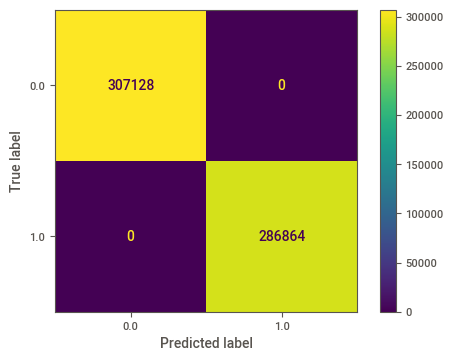

In [216]:
metrics.plot_confusion_matrix(tree_classifier_full, X_train_transformed, y_train)

##### Forest #####

In [171]:
forest = RandomForestClassifier()
params = {'max_depth': [10, 30, 35], 'n_estimators':[5, 6, 7]}
grid_forest = GridSearchCV(forest, params).fit(X_train_transformed, y_train_under)

In [173]:
grid_forest.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=5)

In [200]:
best_forest = RandomForestClassifier(max_depth=10, n_estimators=5).fit(X_train_transformed, y_train)

In [302]:
importances = pd.DataFrame(data = {'Variable': best_forest.feature_names_in_, 'Importance': best_forest.feature_importances_})
importances = importances.sort_values(by= 'Importance', ascending=False)
importances

,Variable,Importance
11,Delay_brackets,0.909961
3,Actual_Shipment_Time,0.041409
4,Planned_Shipment_Time,0.023330
5,Planned_Delivery_Time,0.009196
6,Carrier_Name,0.009130
9,Destination,0.002745
8,Source,0.001609
7,Planned_TimeofTravel,0.001077
10,Distance,0.000738
1,DayofMonth,0.000376


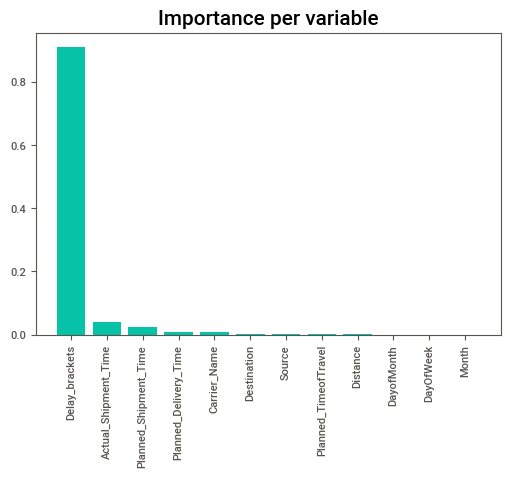

In [ ]:
plt.bar(x=importances['Variable'], height=importances['Importance'], color='#06C2A6')
plt.title('Importance per variable', size=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
import seaborn as sns

C:\Users\tllt1\AppData\Local\Temp\ipykernel_4092\2037593366.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


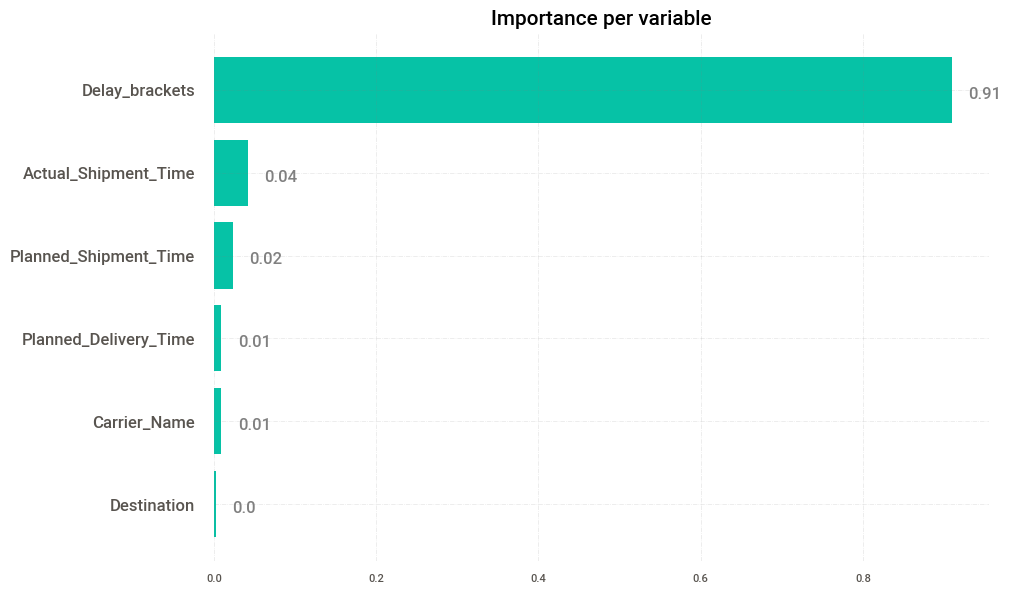

In [364]:
fig, ax = plt.subplots(figsize =(10, 7))

# Horizontal Bar Plot
ax.barh(importances['Variable'].head(6),importances['Importance'].head(6), color='#06C2A6')
plt.yticks(fontsize=12)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

    # Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values 
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.02, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Importance per variable',
             loc ='center', size=15 )

plt.show()

In [202]:
pred_simple_forest = best_forest.predict(X_train_transformed)
pred_simple_forest

array([1., 0., 1., ..., 0., 0., 0.])

In [203]:
metrics.roc_auc_score(y_train, pred_simple_forest)

0.9268262288591965

In [204]:
predict_proba_forest = best_forest.predict_proba(X_train_transformed)
predict_proba_forest

array([[0.47974397, 0.52025603],
       [0.69908049, 0.30091951],
       [0.        , 1.        ],
       ...,
       [0.96830409, 0.03169591],
       [0.98519531, 0.01480469],
       [0.8719956 , 0.1280044 ]])

In [205]:
metrics.roc_auc_score(y_train, predict_proba_forest[:,1])

0.9880073372701481

C:\Users\tllt1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


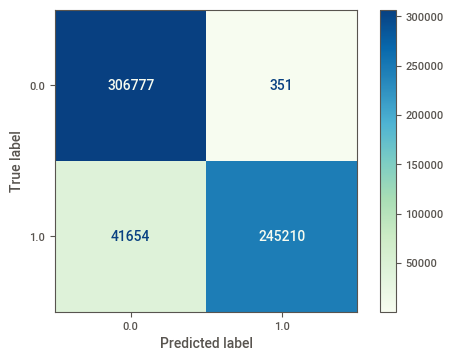

In [300]:
metrics.plot_confusion_matrix(best_forest, X_train_transformed, y_train, cmap='GnBu')

In [336]:
from sklearn.metrics import confusion_matrix

In [337]:
cf_matrix = confusion_matrix(y_train, pred_simple_forest)
print(cf_matrix)

[[306777    351]
 [ 41654 245210]]


<AxesSubplot:>

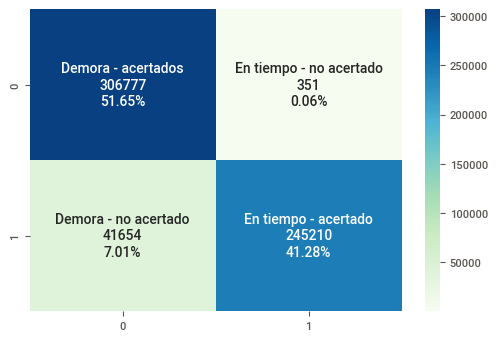

In [353]:
group_names = ['Demora - acertados','En tiempo - no acertado','Demora - no acertado','En tiempo - acertado']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='GnBu')


In [206]:
test_forest = pipeline_delivery.transform(X_test)

In [207]:
pred_data_test = best_forest.predict(test_forest)

In [208]:
metrics.roc_auc_score(y_test, pred_data_test)

0.9267135753536003

In [209]:
pred_proba_data_test = best_forest.predict_proba(test_forest)

In [210]:
metrics.roc_auc_score(y_test, pred_proba_data_test[:,1])

0.9874020003080831